# Use this code to take a closer looks at the raw video data.  

1-You can find sections where outside lights contaminate the tracking.

2-You can verify the mask.

3-This is also a good way to understand part of the processing pipeline for position data.

Number of Records: 291704
('number of records: ', 291704)
35422561


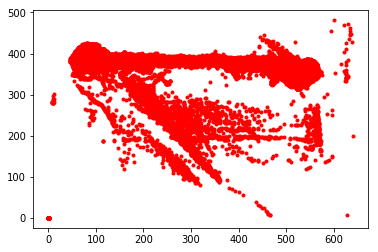

In [107]:
import VideoUtils as vu
import numpy as np
from matplotlib import pyplot as plt

import array

from scipy import ndimage

timestamps, xpt, ypt, dwP, dnT = vu.getVideoData('./RawData/VT1.Nvt')

xloc, yloc, ts = vu.getTrackerXY_Points('./RawData/VT1.Nvt')


npzfile = np.load('./RawData/EPOCHS.npz')
start = npzfile['arr_0'].astype(int)
stop = npzfile['arr_1'].astype(int)

#print(ts[79000:79200]//100)
maze_ts = ts[start:stop]//100
print(maze_ts[0])
x_loc_pix = np.round(xloc/(np.max(xloc)/640))
y_loc_pix = np.round(yloc/(np.max(yloc)/480))

maze_xloc = x_loc_pix[start:stop]
maze_yloc = y_loc_pix[start:stop]

plt.plot(maze_xloc, maze_yloc, 'r.')

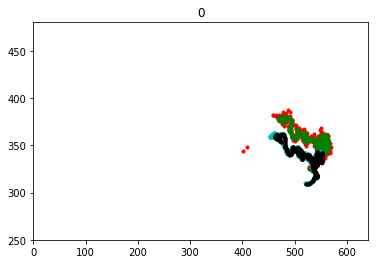

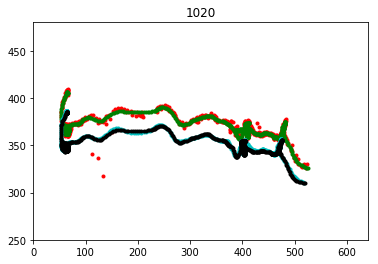

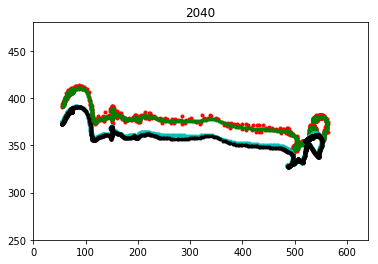

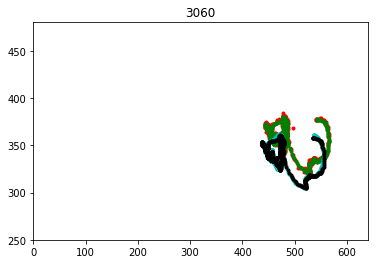

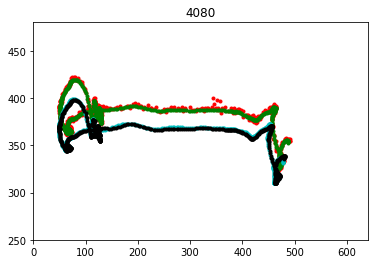

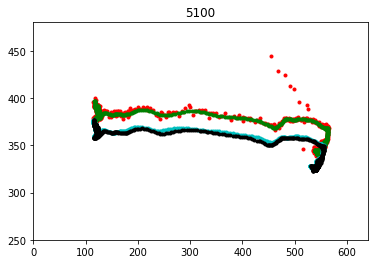

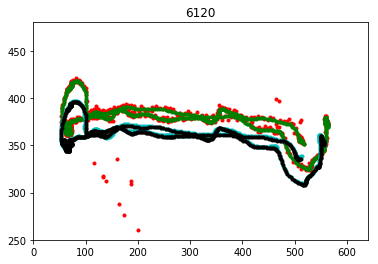

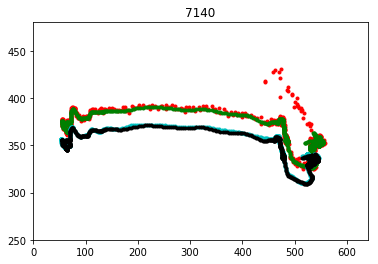

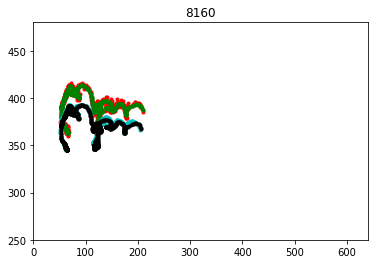

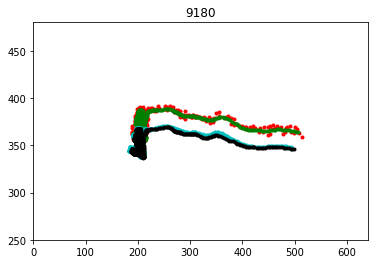

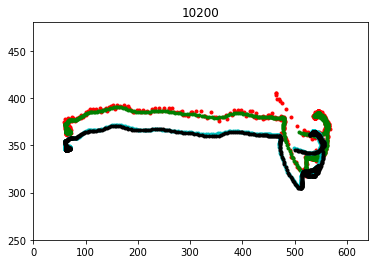

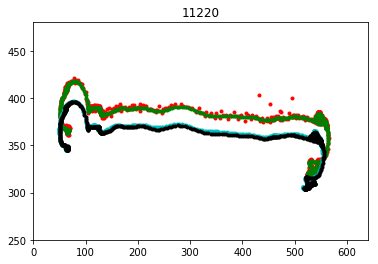

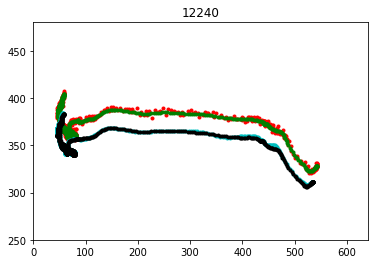

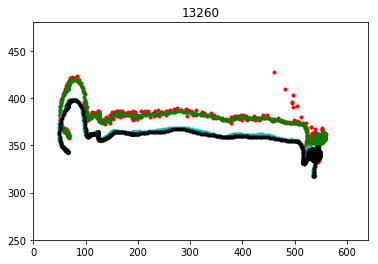

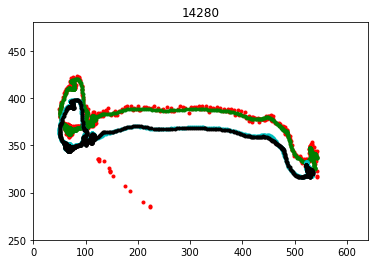

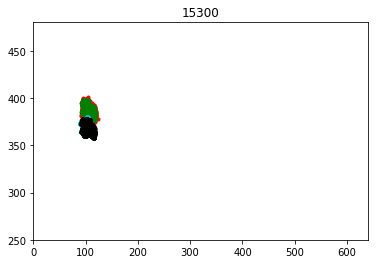

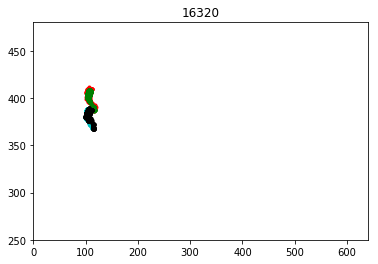

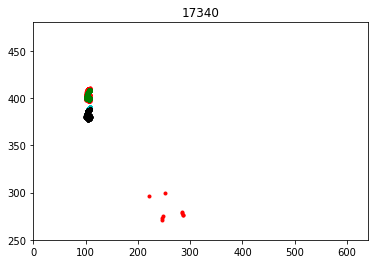

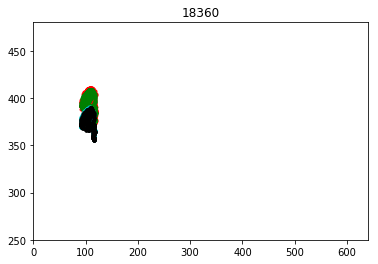

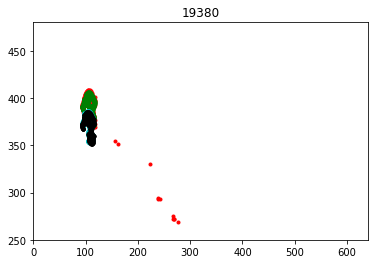

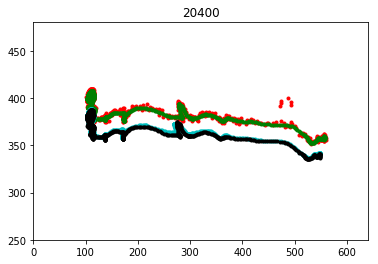

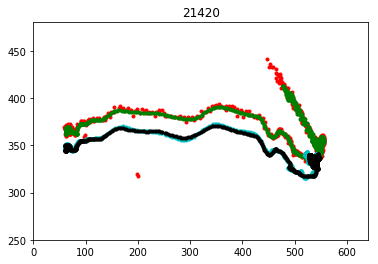

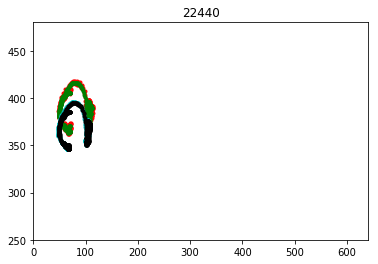

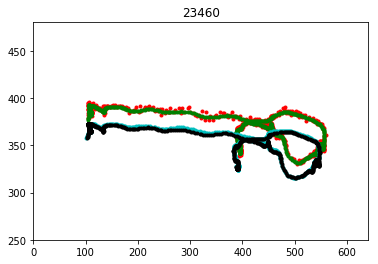

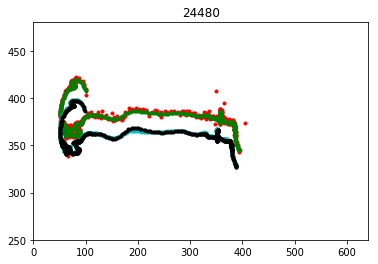

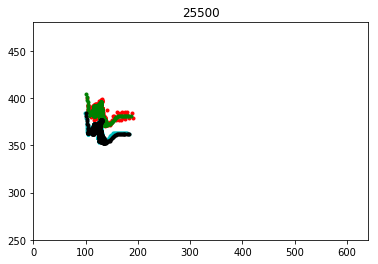

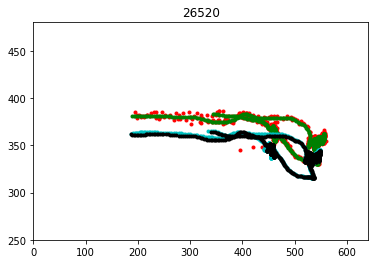

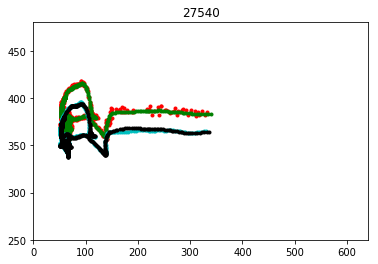

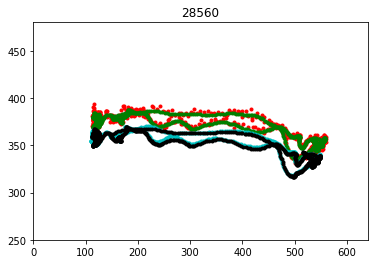

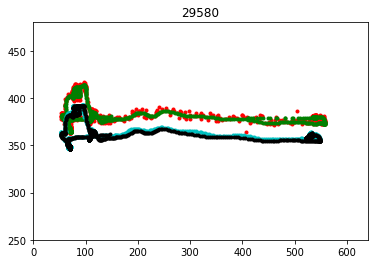

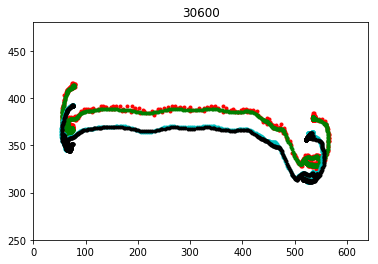

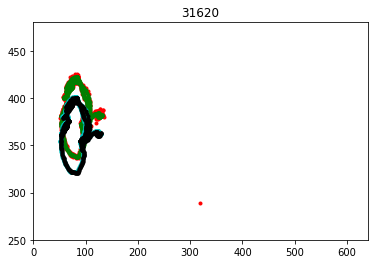

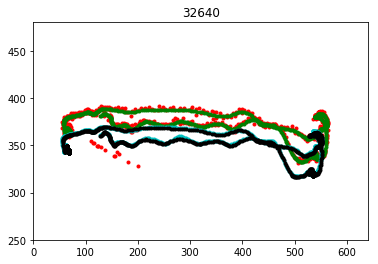

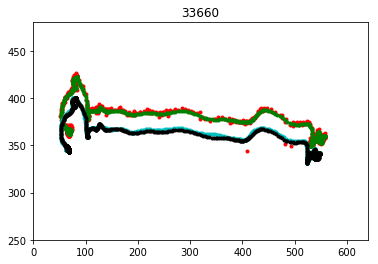

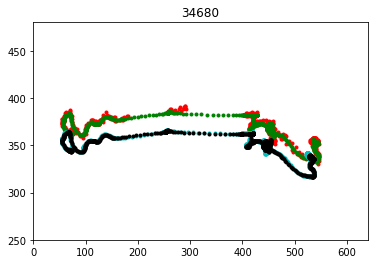

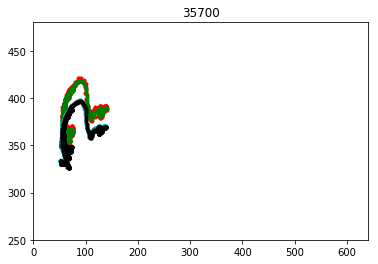

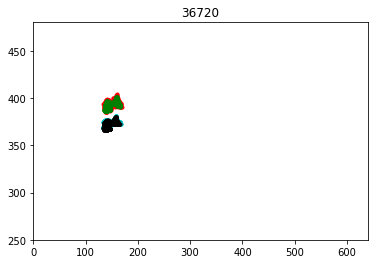

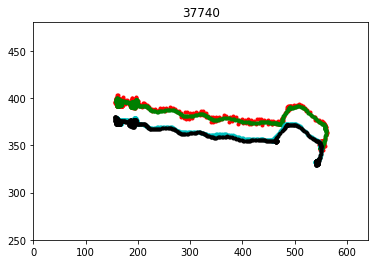

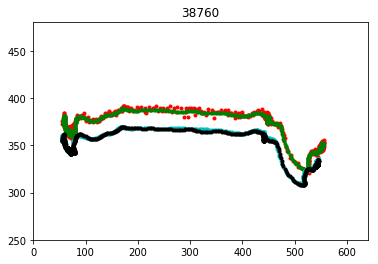

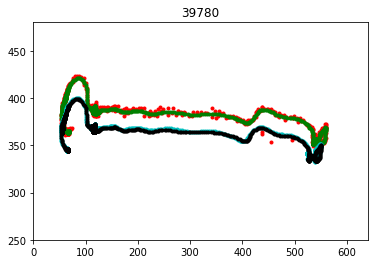

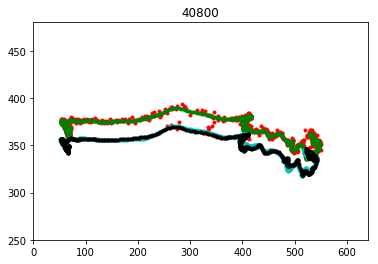

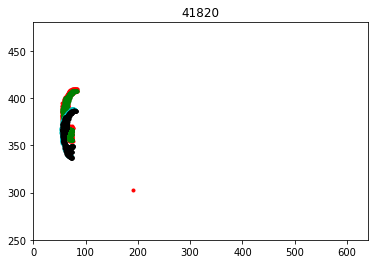

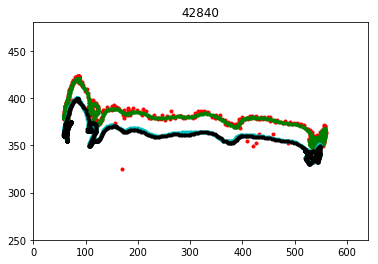

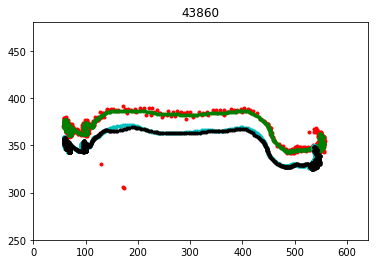

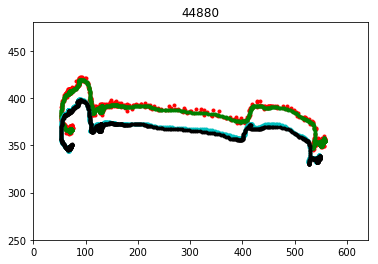

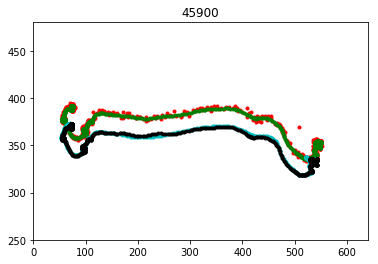

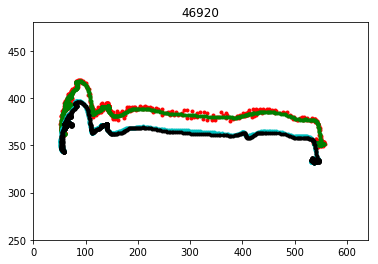

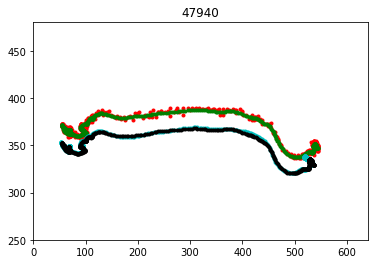

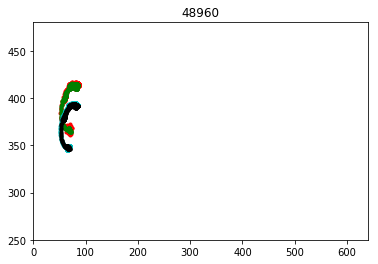

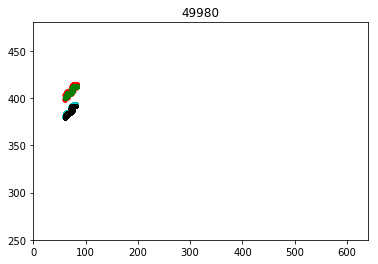

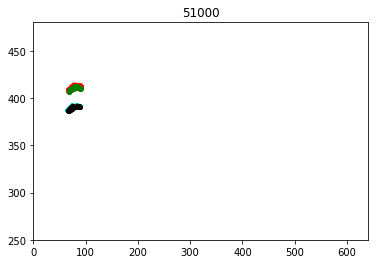

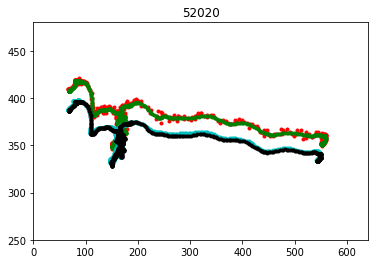

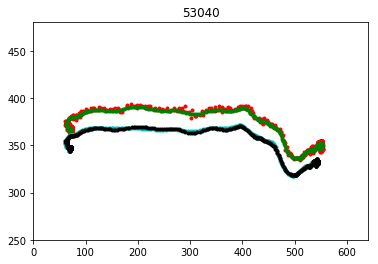

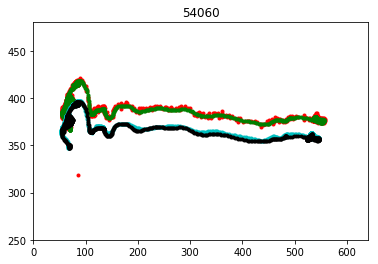

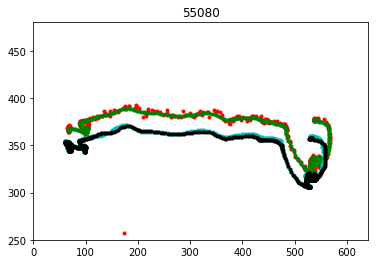

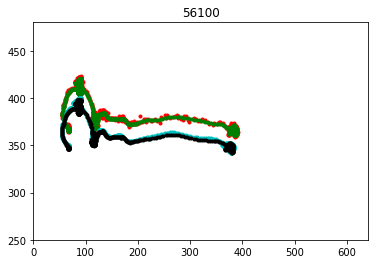

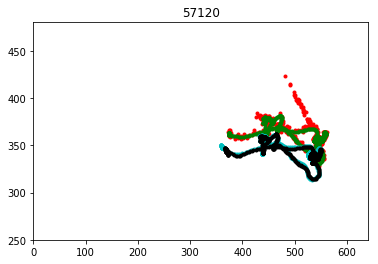

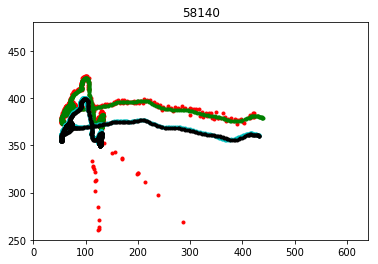

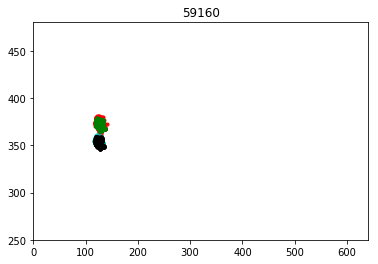

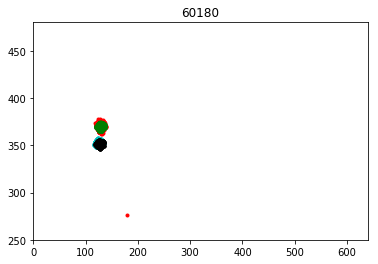

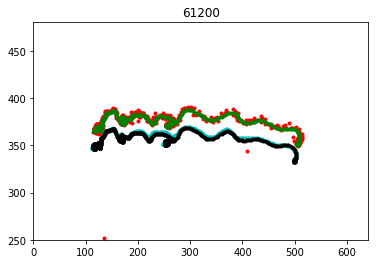

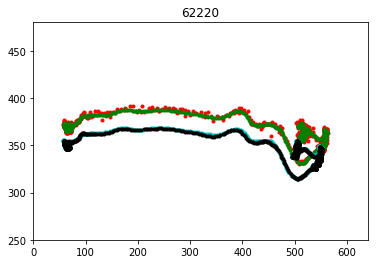

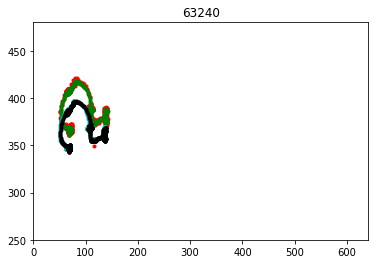

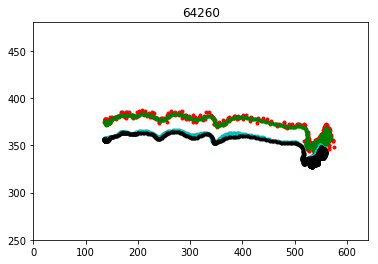

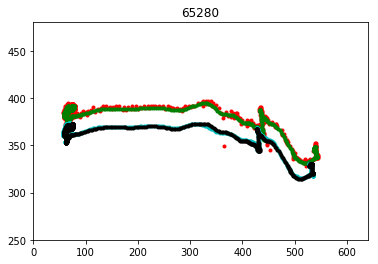

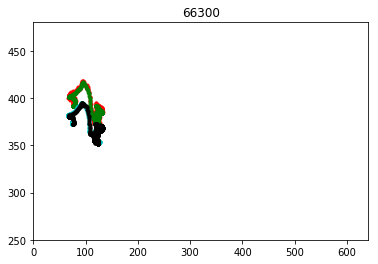

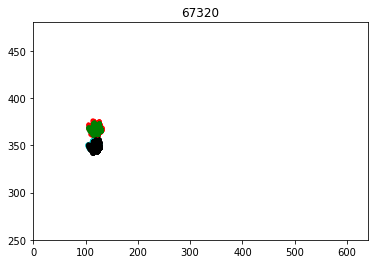

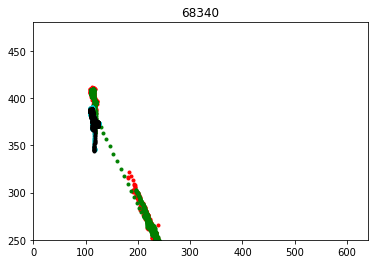

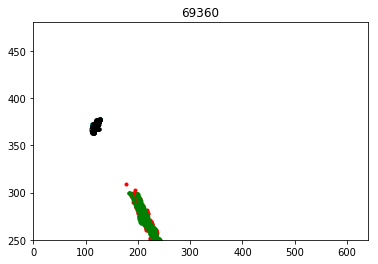

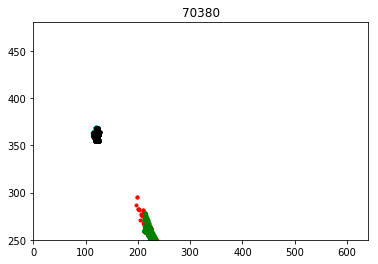

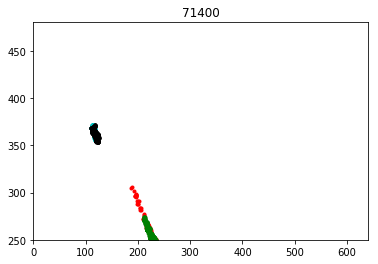

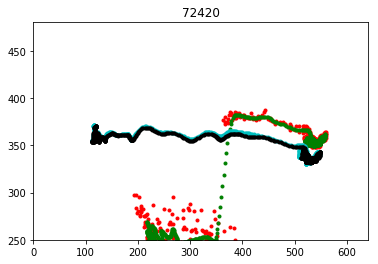

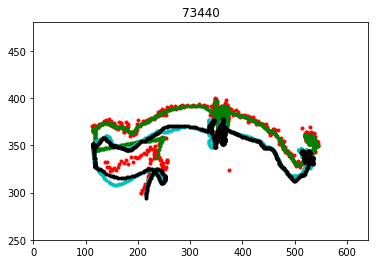

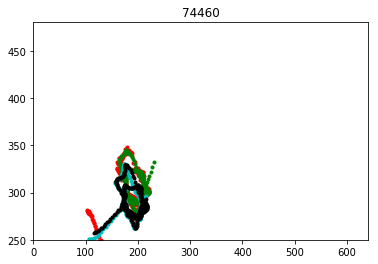

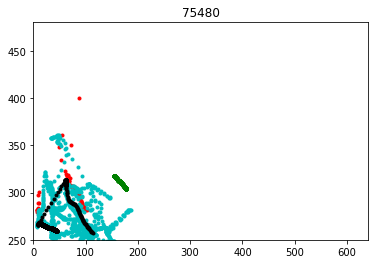

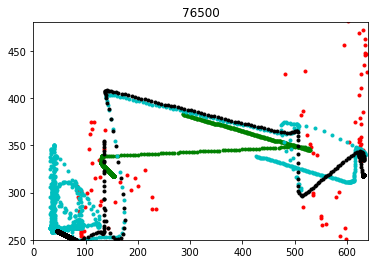

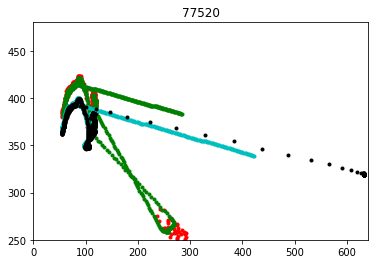

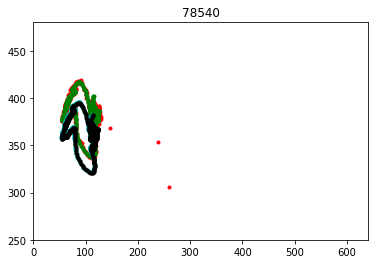

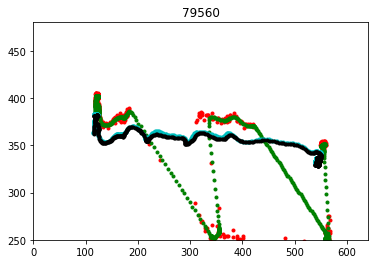

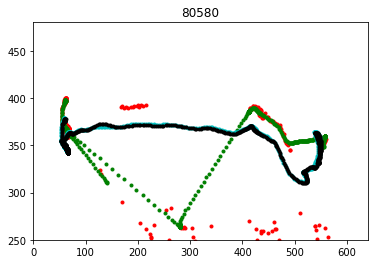

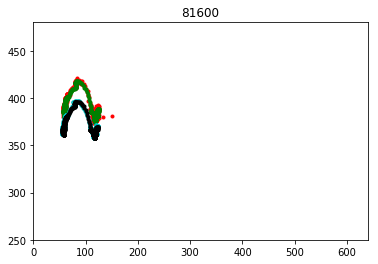

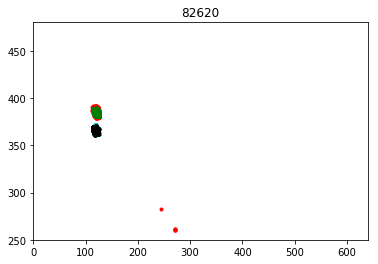

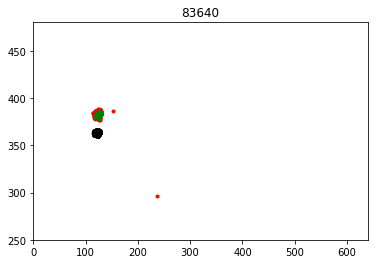

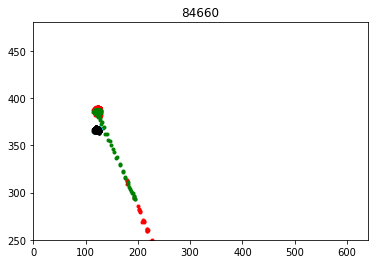

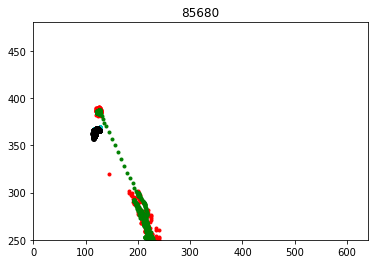

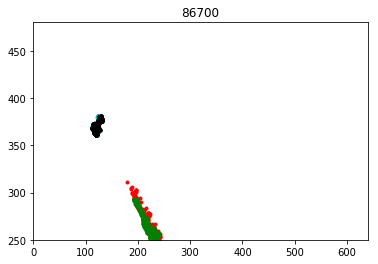

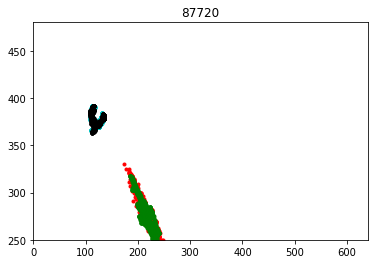

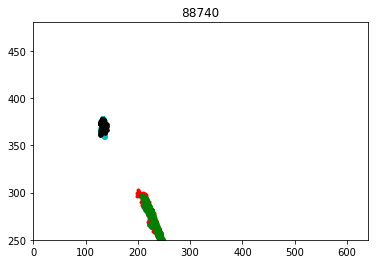

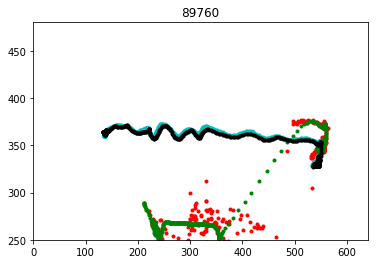

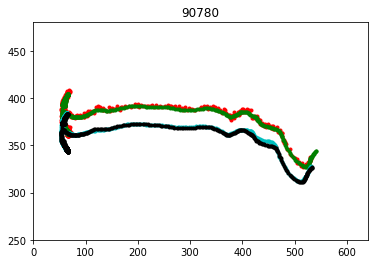

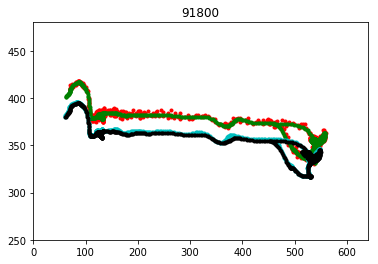

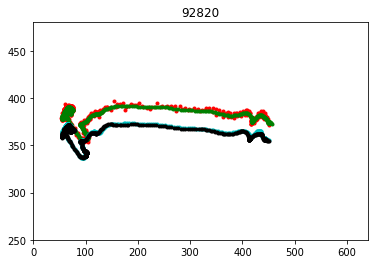

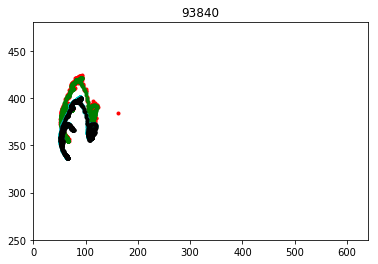

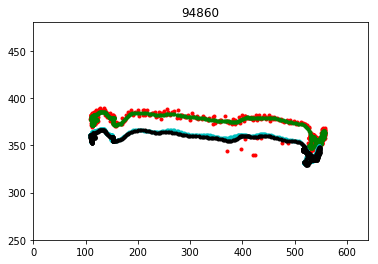

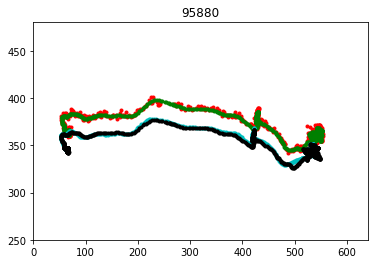

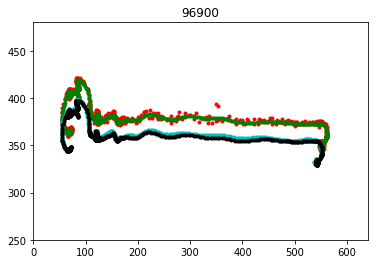

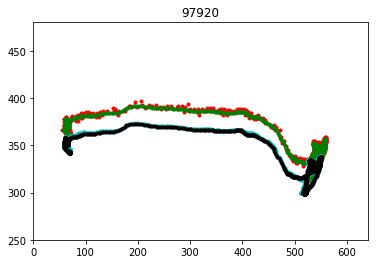

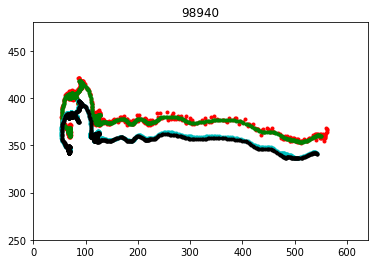

In [108]:
dnTpvdts, dnTpvdx, dnTpvdy = vu.readPVDfile('./RawData/maze_dnTout.pvd')

dwPpvdts, dwPpvdx, dwPpvdy = vu.readPVDfile('./RawData/maze_dwPout.pvd')

pvdts, pvdx, pvdy = vu.readPVDfile('./RawData/maze_trackerout.pvd')

starts = np.arange(0,len(maze_ts), len(maze_ts)//100)

for start in starts[:-2]:
    stop = start + len(maze_ts)//100
    plt.plot(maze_xloc[start:stop],maze_yloc[start:stop],'r.')
    plt.plot(pvdx[start:stop], pvdy[start:stop], 'g.')
    plt.plot(dwPpvdx[start:stop], dwPpvdy[start:stop], 'c.')
    plt.plot(dnTpvdx[start:stop], dnTpvdy[start:stop], 'k.')
    #accum = returnVideoSeg(segment)
    #mask = np.zeros_like(accum)
    
    #mask[np.where(accum>1)] = 1
    #plt.subplot(1,2,1)
    #plt.imshow(mask)
    #plt.subplot(1,2,2)
    #plt.imshow(accum)
    plt.xlim(0,640)
    plt.ylim(250,480)

    plt.title(str(start))
    plt.show()
    #plt.plot(np.diff(dwPpvdts))
    #plt.show()
    

In [27]:
print(pvdx)

[97. 96. 96. ... 64. 64. 64.]


(250, 480)

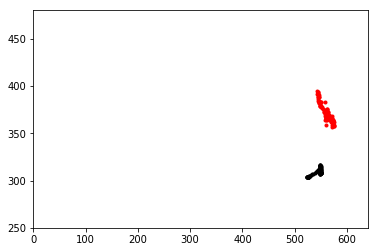

In [28]:
plt.plot(pvdx[500:600], pvdy[500:600], 'k.')
plt.xlim(0,640)
plt.ylim(250,480)

plt.plot(maze_xloc[500:600], maze_yloc[500:600], 'r.')
plt.xlim(0,640)
plt.ylim(250,480)


In [ ]:
for start in starts[:-2]:
    stop = len(ts)//100
    plt.plot(x_loc_pix[start:start+stop], y_loc_pix[start:start+stop], 'r,')
    plt.show()
    
    

In [ ]:
plt.hist(xpt)
plt.show()

In [ ]:
##in set the ylims and xlims for the track (can help eliminate
# contimination.  Make sure you don't cut the good data out.
print(np.shape(dnT))
xlim = [0, 640]
ylim = [250, 480]

In [ ]:
##accumulate the binary pixels for each frame in a segment

def returnVideoSeg(segment):
  accumulate = np.zeros([640,480])
  for ii,targets in enumerate(segment):
    for t in targets:
        line = format(t, '032b')
        print("line: ", line)
        pure = line[0:4]
        y = int(line[4:16], 2)
        raw = line[16:20]
        x = int(line[20:], 2)
        if (ylim[0] < y < ylim[1] and xlim[0] < x < xlim[1]):
           accumulate[x,y] += 1
  return accumulate      

In [ ]:
##use this setion to plot a series segments to help 
# identify problematic segments.  mstart and mstop
# are the start and stop of the maze epochs.

starts = np.arange(start,stop, len(dwP)//100)
for start in starts[:-2]:
    segment = dwP[start:start+c]
    accum = returnVideoSeg(segment)
    mask = np.zeros_like(accum)
    
    mask[np.where(accum>1)] = 1
    plt.subplot(1,2,1)
    plt.imshow(mask)
    plt.subplot(1,2,2)
    plt.imshow(accum)
    plt.title(str(start))
    plt.show()
    

In [ ]:

segment = dwP[78000:220000]
accum = returnVideoSeg(segment)
mask = np.zeros_like(accum)
    
mask[np.where(accum>1)] = 1
plt.imshow(mask)
plt.show()

In [ ]:
mask = ndimage.binary_dilation(mask, structure=np.ones((10,10)))
  #erode and dilate mask to find outline of maze

plt.imshow(mask)
plt.show()
mask = ndimage.binary_erosion(mask, structure=np.ones((10,10)))

#mask = ndimage.binary_dilation(mask, structure=np.ones((10,50)))

plt.imshow(mask)
plt.show()

In [ ]:
plt.plot(xpt, ypt, 'r.')
plt.show()

In [ ]:
print(np)